In [50]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential1
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load


%matplotlib inline

In [51]:

df = pd.read_csv('loan_data.csv')


In [52]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [53]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [54]:
df['not.fully.paid'].isnull().mean()

0.0

In [55]:
df1=pd.get_dummies(df, columns=['purpose'])

In [56]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [57]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [58]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<Axes: xlabel='not.fully.paid', ylabel='count'>

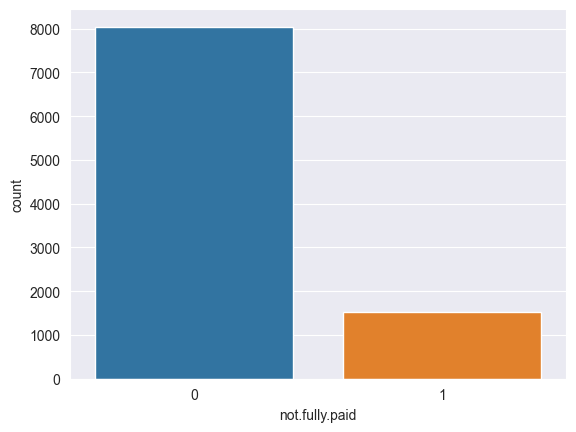

In [59]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

In [60]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()

In [61]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [62]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [63]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
not.fully.paid
0    8045
1    8045
Name: count, dtype: int64


<Axes: xlabel='not.fully.paid', ylabel='count'>

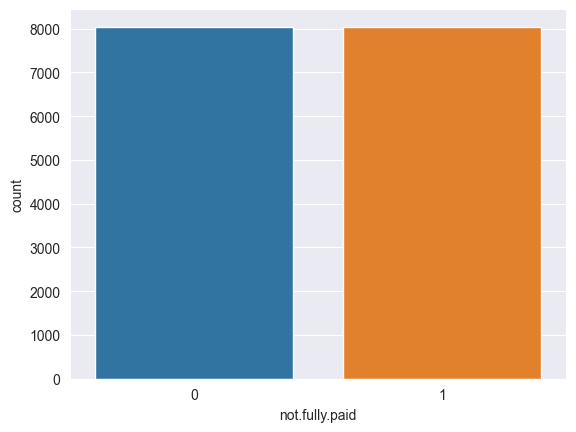

In [64]:
#df_test_over['not.fully.paid'].value_counts().plot(kind='bar', title='Count (not.fully.paid)')

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

<Axes: >

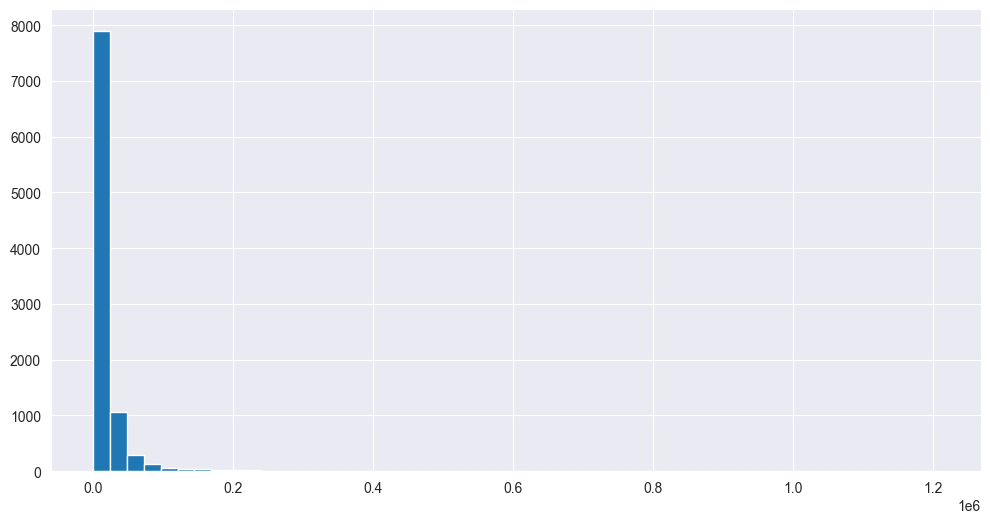

In [65]:
df['revol.bal'].hist(figsize=[12,6], bins=50)

In [66]:
df1=pd.get_dummies(df, columns=['purpose'])

Text(0.5, 0, 'FICO')

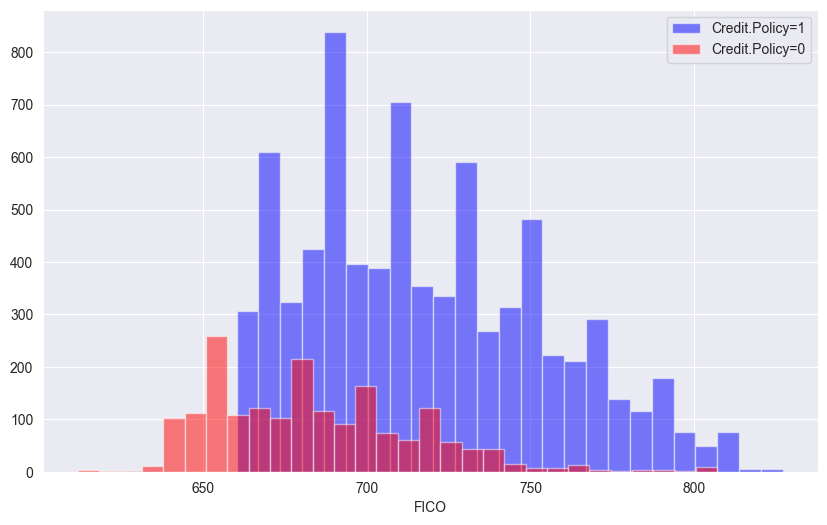

In [67]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

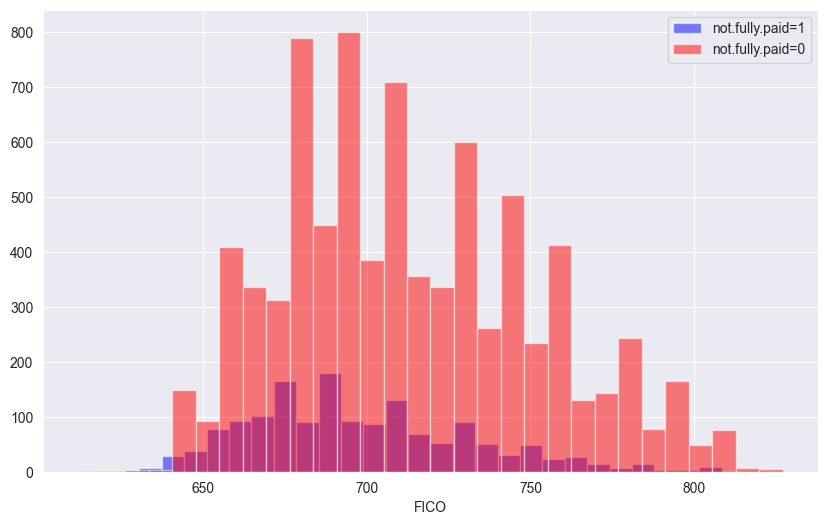

In [68]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

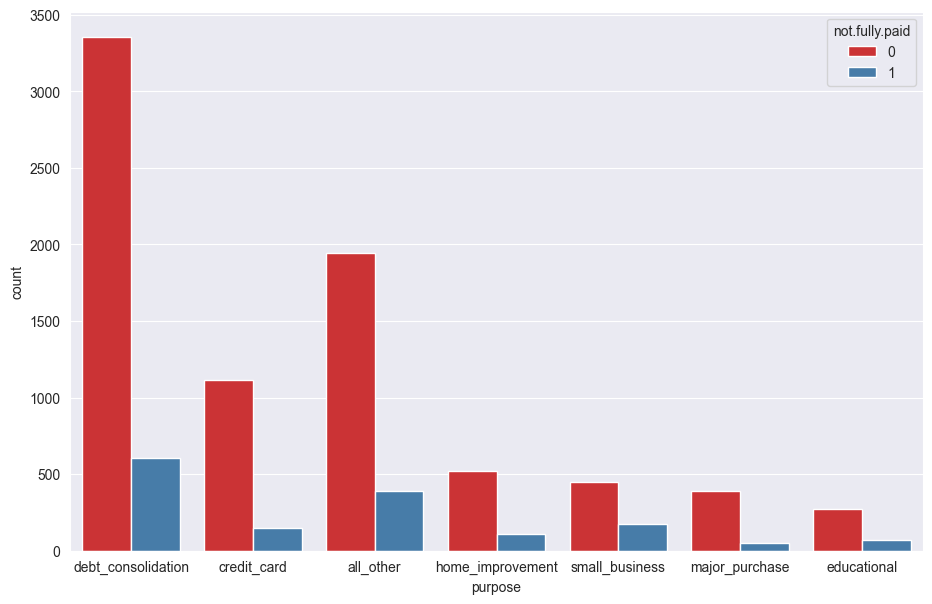

In [69]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

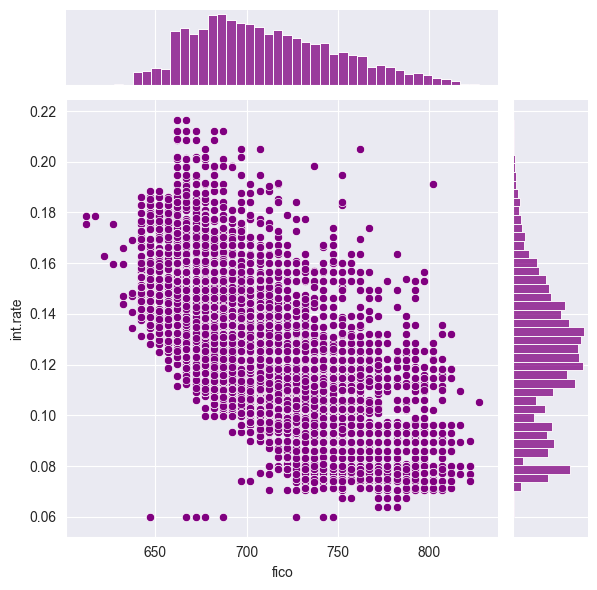

In [70]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 1100x700 with 0 Axes>

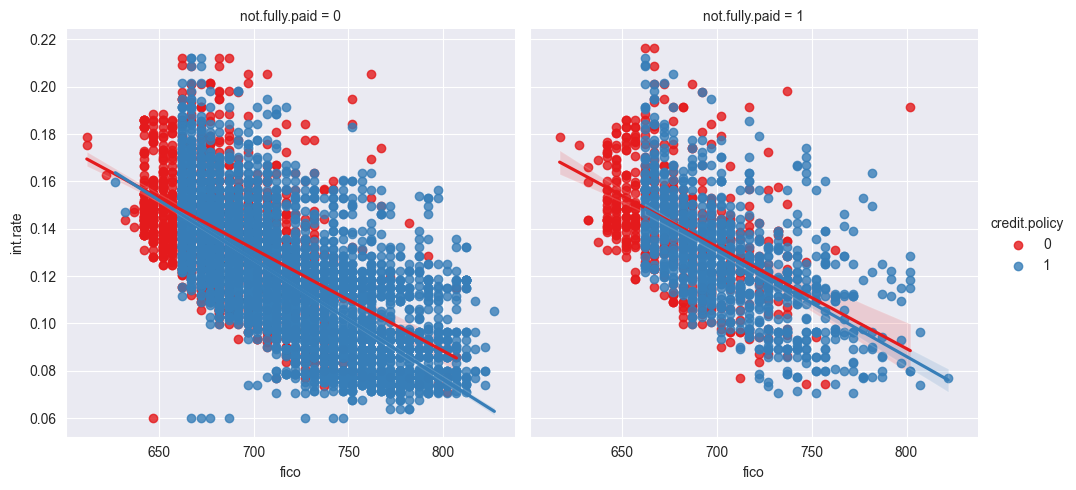

In [71]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [72]:
cat_feats = ['purpose']
#cat_feats =df_test_over

In [73]:
#final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)

In [74]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 0 to 7766
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         16090 non

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [75]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.285805,0.052895,0.004839,-0.099004,0.373633,0.098024,-0.186005,-0.099689,-0.541986,-0.055952,-0.064908,-0.191447,0.006501,0.032023,-0.022773,-0.012582,0.044953,-0.010736
int.rate,-0.285805,1.000000,0.278980,0.096492,0.198978,-0.681049,-0.098619,0.095912,0.422678,0.190099,0.144750,0.110518,0.226260,-0.045110,0.080173,-0.021434,-0.041555,-0.067705,0.195778
installment,0.052895,0.278980,1.000000,0.484603,0.033211,0.102731,0.185612,0.257014,0.056308,-0.019065,0.001117,-0.033935,0.071288,0.005063,0.112068,-0.094465,0.027220,-0.047756,0.191499
log.annual.inc,0.004839,0.096492,0.484603,1.000000,-0.032575,0.098941,0.344626,0.386416,0.079253,0.038524,0.018212,0.017095,-0.046465,0.075783,-0.030586,-0.116695,0.101883,-0.030020,0.127772
dti,-0.099004,0.198978,0.033211,-0.032575,1.000000,-0.219171,0.092929,0.160926,0.327905,0.031523,-0.039859,0.017084,0.052528,0.072804,0.189702,-0.033457,-0.090837,-0.075641,-0.059903
fico,0.373633,-0.681049,0.102731,0.098941,-0.219171,1.000000,0.258459,0.001194,-0.498968,-0.193760,-0.203173,-0.155771,-0.208326,-0.010541,-0.136775,-0.015361,0.091386,0.070689,0.059896
days.with.cr.line,0.098024,-0.098619,0.185612,0.344626,0.092929,0.258459,1.000000,0.243262,0.020534,-0.038377,0.070771,0.068334,-0.041740,0.057980,0.004296,-0.052193,0.074688,-0.025749,0.045455
revol.bal,-0.186005,0.095912,0.257014,0.386416,0.160926,0.001194,0.243262,1.000000,0.163306,0.032779,-0.030665,-0.034486,0.057571,0.050769,-0.008157,-0.034818,-0.018174,-0.056002,0.128923
revol.util,-0.099689,0.422678,0.056308,0.079253,0.327905,-0.498968,0.020534,0.163306,1.000000,-0.023458,-0.054680,0.076584,0.101369,0.091499,0.192773,-0.056666,-0.108345,-0.120298,-0.048088
inq.last.6mths,-0.541986,0.190099,-0.019065,0.038524,0.031523,-0.193760,-0.038377,0.032779,-0.023458,1.000000,0.016219,0.105238,0.175412,-0.028436,-0.065816,0.024223,0.066851,-0.001333,0.036711


<Axes: >

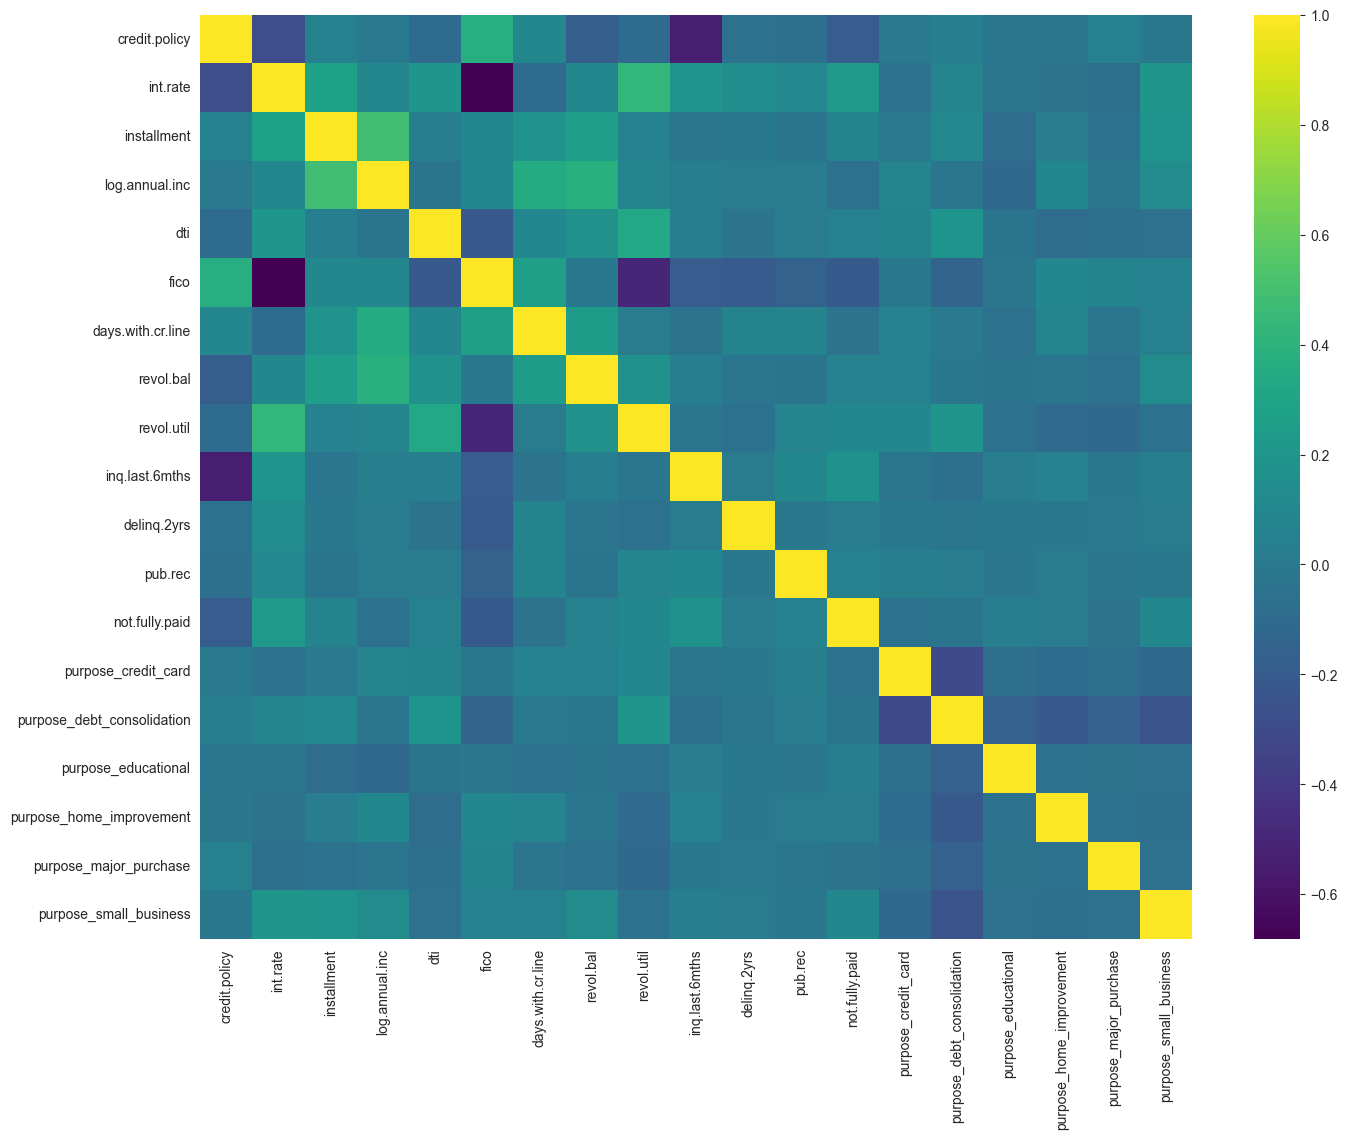

In [76]:
plt.figure(
        figsize=[16,12]
)

sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [77]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)
#We only focus on the grids of yellow or very light green. After comparing with the feature description again,  revol.bal,day.with.cr.line,installment can repsent by annual income. revol.util can repsent by int.rate,  

In [78]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

In [79]:
#to_train = df1[df1['not.fully.paid'].isin([0,1])]
#to_pred = df1[df1['not.fully.paid'] == 2]

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [80]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [81]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
X_train.shape

(11263, 15)

In [93]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [84]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 11ms/step - loss: 0.6813 - accuracy: 0.5737 - val_loss: 0.6640 - val_accuracy: 0.6068
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6559 - accuracy: 0.6085 - val_loss: 0.6533 - val_accuracy: 0.6027
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6498 - accuracy: 0.6131 - val_loss: 0.6499 - val_accuracy: 0.6093
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6461 - accuracy: 0.6203 - val_loss: 0.6506 - val_accuracy: 0.6093
Epoch 5/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.6247 - val_loss: 0.6469 - val_accuracy: 0.6124
Epoch 6/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6439 - accuracy: 0.6200 - val_loss: 0.6489 - val_accuracy: 0.6107
Epoch 7/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.6203 - val_loss: 0.6468 - val_accuracy: 0.6157
Epoch 8/200


<Axes: >

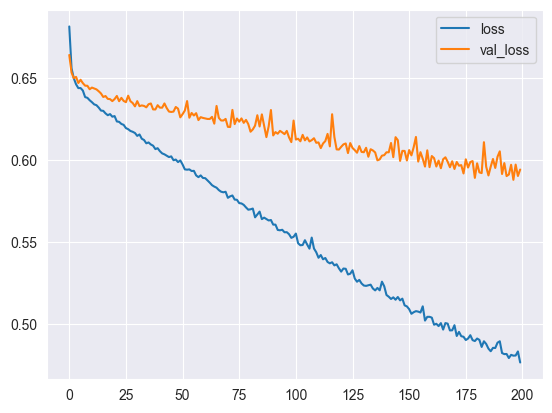

In [85]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

In [94]:
# predictions1 = model.predict_classes(X_test)

# print(
#         confusion_matrix(y_test,predictions1), 
#         '\n', 
#         classification_report(y_test,predictions1)
# )

In [87]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 12ms/step - loss: 0.6865 - binary_accuracy: 0.5525 - val_loss: 0.6728 - val_binary_accuracy: 0.6006
Epoch 2/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6690 - binary_accuracy: 0.5895 - val_loss: 0.6583 - val_binary_accuracy: 0.6020
Epoch 3/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6636 - binary_accuracy: 0.5926 - val_loss: 0.6540 - val_binary_accuracy: 0.6070
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6573 - binary_accuracy: 0.6087 - val_loss: 0.6511 - val_binary_accuracy: 0.6105
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6534 - binary_accuracy: 0.6116 - val_loss: 0.6504 - val_binary_accuracy: 0.6047
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6517 - binary_accuracy: 0.6117 - val_loss: 0.6479 - val_binary_accuracy: 0.6058
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - lo

<Axes: >

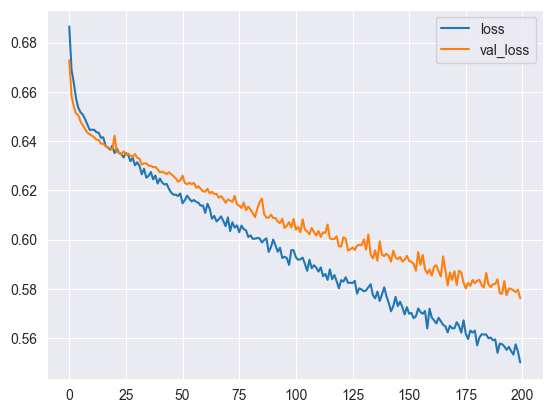

In [88]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() #The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model

In [89]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

151/151 [==============================] - 0s 1ms/step
[[ 513 1924]
 [  56 2334]] 
               precision    recall  f1-score   support

           0       0.90      0.21      0.34      2437
           1       0.55      0.98      0.70      2390

    accuracy                           0.59      4827
   macro avg       0.72      0.59      0.52      4827
weighted avg       0.73      0.59      0.52      4827



In [90]:
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('my_model_lending_club.h5')

In [91]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('my_model_lending_club.h5')



In [92]:
X_OOT = to_pred.drop('not.fully.paid', axis=1).values
to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 15)
